<a href="https://colab.research.google.com/github/Fcazarez/Ecuador_Data_Science/blob/main/CDE__Semana_III_Reto_3__DataCraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia de datos Ecuador

# Reto 3, Semana 3

# EDA + Visualizacion: Credit Card Spending Habits Survey

## Felix Cazarez

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [34]:
url = '/content/drive/MyDrive/CSE_Intro_python/Credit Card Spending Habits Survey(1-37).csv'
df = pd.read_csv(url, encoding='latin1')  # or 'iso-8859-1' or 'cp1252'


In [35]:
df.sample(5).T

,13,16,35,19,29
ID,14,17,36,20,30
Start time,11-16-23 9:17:06,11-16-23 9:36:41,11-16-23 22:44:25,11-16-23 10:05:46,11-16-23 13:58:39
Completion time,11-16-23 9:18:40,11-16-23 9:38:45,11-16-23 22:47:12,11-16-23 10:07:58,11-16-23 14:00:25
Email,anonymous,anonymous,anonymous,anonymous,anonymous
Name,NaN,NaN,NaN,NaN,NaN
Last modified time,NaN,NaN,NaN,NaN,NaN
What is your age group?,45-54 years,45-54 years,35-44 years,45-54 years,35-44 years
Occupation:,Employed,Student,Employed,Employed,Student
What is your gender?,Male,Male,Female,Female,Female
Income level,$20K - $40K,$10K - $20K,$10K - $20K,Less than $10K,Less than $10K


In [36]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'What is your age group?', 'Occupation:',
       'What is your gender?', 'Income level',
       'How long have you been using credit card?',
       'How many credit cards do you currently have?',
       'What percentage of your monthly expenses do you typically charge to your credit card(s)?',
       'Have you ever missed a credit card payment?',
       'Which of the following best describes your primary reason for using a credit card?',
       'On average, how much do you charge to your credit card per month?',
       'What types of purchases do you most commonly make with your credit card(s)?',
       ' How often do you pay your credit card balance in full each month?',
       'In your opinion, what is the most important improvement that could be made to credit card services to better meet your needs?',
       'Thank you for sharing your credit card spending habits with us. Your input is valua

In [37]:
df = df.drop(['ID', 'Start time', 'Completion time', 'Email', 'Name',
              'Last modified time',
              'Thank you for sharing your credit card spending habits with us. Your input is valuable. If you have any additional comments or suggestions, please feel free to share them below.'], axis=1)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                         --------------  ----- 
 0   What is your age group?                                                                                                        37 non-null     object
 1   Occupation:                                                                                                                    36 non-null     object
 2   What is your gender?                                                                                                           37 non-null     object
 3   Income level                                                                                                         

In [39]:
df.columns

Index(['What is your age group?', 'Occupation:', 'What is your gender?',
       'Income level', 'How long have you been using credit card?',
       'How many credit cards do you currently have?',
       'What percentage of your monthly expenses do you typically charge to your credit card(s)?',
       'Have you ever missed a credit card payment?',
       'Which of the following best describes your primary reason for using a credit card?',
       'On average, how much do you charge to your credit card per month?',
       'What types of purchases do you most commonly make with your credit card(s)?',
       ' How often do you pay your credit card balance in full each month?',
       'In your opinion, what is the most important improvement that could be made to credit card services to better meet your needs?'],
      dtype='object')

In [40]:
df = df.rename(columns={'What is your age group?': 'Age', 'Occupation:': 'Ocupation', 'What is your gender?': 'Genre',
       'Income level': 'Income', 'How long have you been using credit card?': 'Time',
       'How many credit cards do you currently have?': 'Number_CC',
       'What percentage of your monthly expenses do you typically charge to your credit card(s)?': '%_Monthly_Expenses',
       'Have you ever missed a credit card payment?': 'Missed_Payment',
       'Which of the following best describes your primary reason for using a credit card?': 'Reason_CC',
       'On average, how much do you charge to your credit card per month?': 'Average_Charge',
       'What types of purchases do you most commonly make with your credit card(s)?': 'Purchases',
       ' How often do you pay your credit card balance in full each month?': 'Pay_Balance',
       'In your opinion, what is the most important improvement that could be made to credit card services to better meet your needs?': 'Improvement'})

In [41]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 37 non-null     object
 1   Ocupation           36 non-null     object
 2   Gendre              37 non-null     object
 3   Income              37 non-null     object
 4   Time                37 non-null     object
 5   Number_CC           37 non-null     object
 6   %_Monthly_Expenses  37 non-null     object
 7   Missed_Payment      36 non-null     object
 8   Reason_CC           37 non-null     object
 9   Average_Charge      37 non-null     object
 10  Purchases           37 non-null     object
 11  Pay_Balance         37 non-null     object
 12  Improvement         37 non-null     object
dtypes: object(13)
memory usage: 3.9+ KB


In [42]:
df.columns


Index(['Age', 'Ocupation', 'Gendre', 'Income', 'Time', 'Number_CC',
       '%_Monthly_Expenses', 'Missed_Payment', 'Reason_CC', 'Average_Charge',
       'Purchases', 'Pay_Balance', 'Improvement'],
      dtype='object')

In [51]:
# Total number of records
total_records = 37

# Count the unique values in each column and calculate the percentage
for column in df.columns:
    print(f"{column}:")
    value_counts = df[column].value_counts()
    for index, value in value_counts.items():
        percentage = (value / total_records) * 100
        print(f"{index}: {value} ({percentage:.2f}%)")
    print("\n")


Age:
35-44 years: 18 (48.65%)
45-54 years: 14 (37.84%)
25-34 years: 4 (10.81%)
18-24 years: 1 (2.70%)


Ocupation:
Student: 20 (54.05%)
Employed: 12 (32.43%)
Unemployed: 4 (10.81%)


Gendre:
Female: 20 (54.05%)
Male: 17 (45.95%)


Income:
Less than $10K: 15 (40.54%)
$10K - $20K: 9 (24.32%)
$20K - $40K: 8 (21.62%)
$40K - $60K: 4 (10.81%)
$60K or more: 1 (2.70%)


Time:
More than 5 years: 24 (64.86%)
1-2 years: 7 (18.92%)
Less than 6 months: 4 (10.81%)
6 months to 1 year: 2 (5.41%)


Number_CC:
2-3: 23 (62.16%)
1: 12 (32.43%)
4-5: 1 (2.70%)
More than 5: 1 (2.70%)


%_Monthly_Expenses:
Less than 25%: 16 (43.24%)
25% - 50%: 11 (29.73%)
50% - 75%: 6 (16.22%)
75% - 100%: 4 (10.81%)


Missed_Payment:
No: 26 (70.27%)
Yes: 10 (27.03%)


Reason_CC:
Building credit: 19 (51.35%)
Covenience: 11 (29.73%)
Rewards and Cashback: 4 (10.81%)
Emergency expenses: 3 (8.11%)


Average_Charge:
$100 to $500: 18 (48.65%)
$500 to $1000: 9 (24.32%)
$1000 - $2000: 5 (13.51%)
more than $2000: 3 (8.11%)
Less than $1

IndexError: ignored

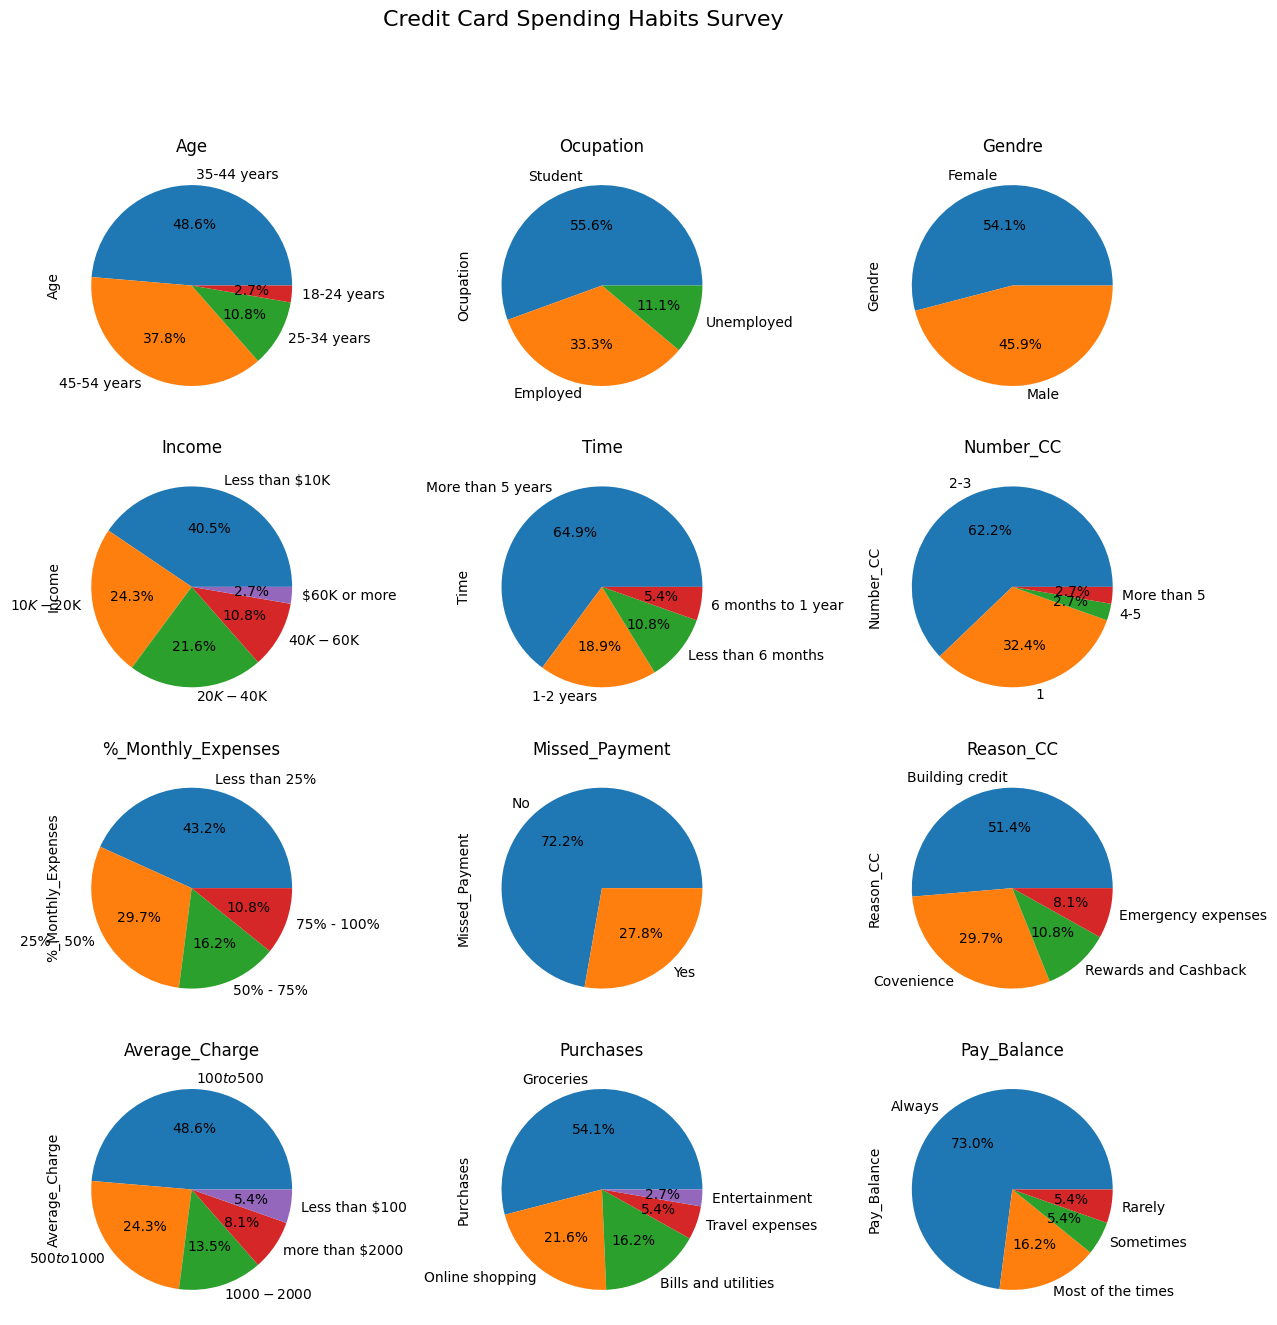

In [58]:
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Add a general title
fig.suptitle("Credit Card Spending Habits Survey", fontsize=16)

# Flatten the axes array so it's easier to iterate over
axes = axes.flatten()

# Iterate over the columns
for i, column in enumerate(df.columns):
    # Create pie chart on i-th subplot
    df[column].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(column)
    # Break the loop if all columns have been plotted
    if i == len(df.columns) - 1:
        break

# Remove the unused subplot (if any)
if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout to make room for the title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()





*Comments:*

The data represents credit card usage among 37 individuals. Most are aged 35-44 (48.65%), students (54.05%), and female (54.05%). Majority earn less than $10K (40.54%) and have held their credit card for over 5 years (64.86%). Most own 2-3 cards (62.16%), spend less than 25% of their income on monthly expenses (43.24%), and have not missed a payment (70.27%). The primary reason for card usage is to build credit (51.35%), with most charges ranging from $100 to $500 (48.65%). Groceries (54.05%) constitute the majority of purchases. Most always pay their balance (72.97%). The most desired improvement is more cashback (37.84%).

This data can help credit card companies tailor their services to customer needs and preferences. Further analysis may be required for a comprehensive understanding.